In [2]:
import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix, roc_auc_score, recall_score, precision_score

# models
from sklearn.svm import SVC


# Support Vector Machines I

<center><img src="https://drive.google.com/uc?export=view&id=1mSJFRHbiydTf3EvIIJr_kgw6Tfz1EXnb" alt="hyperplane plot" width = "400" class="center"/> </center>

In the lecture, we learned about Maximal Margin Classifiers, and Support Vector Classifiers. Both use hyperplanes (aka "flat affine subspaces") that divide our data into two sections.

<center><img src="https://drive.google.com/uc?export=view&id=1zAWlFxIOJchpnJRF3DGiIpv3VdFfq-ci" alt="hyperplane plot" width = "800" class="center"/> </center>

But if the data are linearly separable, there are infinite hyperplanes...HOW DO WE CHOOSE?


<center><img src="https://drive.google.com/uc?export=view&id=1m5GZObdjAFCjMwldvfyfSJkZPABYZr9c" alt="hyperplane plot" width = "400" class="center"/> </center>

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200" class="center"/>

Why is it beneficial to maximize the margin as a way to separate two groups with a hyper plane?

</br>
</br>
</br>
But Maximal Margin Classifiers have a problem...

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200" class="center"/>

How to SVCs solve the major issue with MMCs?


<center><img src="https://drive.google.com/uc?export=view&id=13OZpzK4-BCqjVsquR7XClrvHf64cGGaC" alt="Q" width = "400" class="center"/> </center>



## Constraint vs. Penalty Formulation

We can think of SVCs in two ways:

1. As a penalty on the slack variables ($\xi_i$)

$$ \text{arg min} \frac{1}{2}\left | \bold{w} \right |^2 + C \sum_{i=0}^N \xi_i$$

Where $C$ controls how strongly we penalize non-zero slack variables.

2. As a constraint on the sum of the slack variables ($\xi_i$)
$$ \text{arg min} \frac{1}{2}\left | \bold{w} \right |^2 \text{ subject to } \sum_{i=0}^N \xi_i \leq C_{budget}$$

(this is similar to how we can think of LASSO/Ridge as a penalty on the coefficients OR as a constraint/budget on how large our coefficients can be)

## SVC in sklearn
Let's build a Support Vector Classifier together using the `df_together` data.

In [3]:
from sklearn.datasets import make_blobs

blobs = make_blobs(n_samples = 100, random_state= 1234, centers = 2)
df_together = pd.DataFrame(blobs[0])
df_together.columns = ["X1", "X2"]
df_together["y"] = blobs[1]


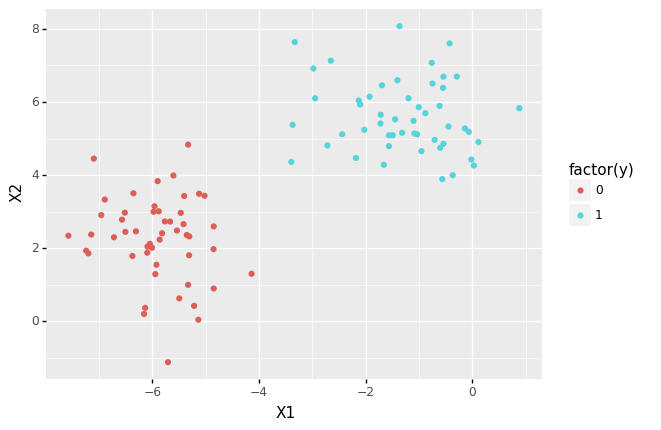

<ggplot: (322088551)>

In [4]:
# plot data

(ggplot(df_together, aes(x='X1',y='X2',color = 'factor(y)')) + geom_point())

In [5]:
# split and organize data

predictors = ['X1', 'X2']

X = df_together[predictors]
y = df_together['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

In [11]:
# build empty model

svm = SVC(kernel = 'linear', C = 0.1, probability = True)

# Note: We add the "probability" here because SVM cannot do predict_proba otherwise

# fit model

svm.fit(X_train, y_train)


# assess performance
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

y_pred_train_p = svm.predict_proba(X_train)[:,1]
y_pred_test_p = svm.predict_proba(X_test)[:,1]

print('Train Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

print('Train AUC: ', roc_auc_score(y_train, y_pred_train_p))
print('Test AUC: ', roc_auc_score(y_test, y_pred_test_p))

Train Accuracy:  1.0
Test Accuracy:  1.0
Train AUC:  1.0
Test AUC:  1.0


# Classwork

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/penguins.csv")

# get rid of chinstrap penguins
df = df.loc[(df.species == "Adelie") |  (df.species == "Gentoo")]
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Try it Out
Here's a simplified penguin dataset that only has Gentoo and Adelie Penguins (Chinstrap penguins have been removed).

- Using ggplot, make a scatterplot of the bill length and bill depth data, coloring the points by species ([review of ggplot](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Lectures/LectureNotebooks/Visualization%20I--Class%204.ipynb))
- Looking at the ggplot, imagine where YOU would draw a line separating these two groups

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

Looking at the data, can you see any reason why a Support Vector Classifier might be more desireable here than a Maximal Margin Classifier? Why? 

Where would the MMC put the dividing hyperplane? Where could SVC put it?

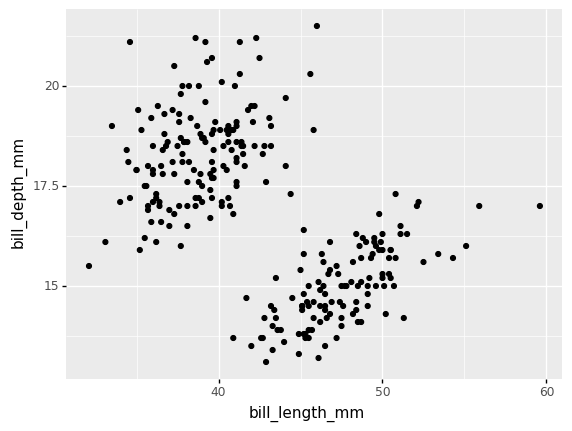

<ggplot: (324883779)>

In [20]:
df = df.dropna()

# plot the ggplot

(ggplot(df, aes(x = 'bill_length_mm',y ='bill_depth_mm')) + geom_point())



- Split your data into a train/test split (80/20)
- z-score your predictors
- Build an empty `SVC()` model with `kernel = "linear"` and `C = 0.1`.
- fit the model
- plot the model using the function `plot_hyperplane()` that I wrote below
- print out the train/test accuracies, and roc aucs. 

### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

If you change the hyperparameter `C` to be 0.01, or 1, what happens to the margin? How many support vectors (points surrounded in red) are there with the different values of C?

In [21]:
### YOUR CODE HERE ###
# organize and split data

predictors = ['bill_length_mm', 'bill_depth_mm']

X = df[predictors]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

svm1 = SVC(kernel = 'linear', C = 0.1, probability = True)

# Note: We add the "probability" here because SVM cannot do predict_proba otherwise

# fit model

svm1.fit(X_train, y_train)


# assess performance
y_pred_train = svm1.predict(X_train)
y_pred_test = svm1.predict(X_test)

y_pred_train_p = svm1.predict_proba(X_train)[:,1]
y_pred_test_p = svm1.predict_proba(X_test)[:,1]

print('Train Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

print('Train AUC: ', roc_auc_score(y_train, y_pred_train_p))
print('Test AUC: ', roc_auc_score(y_test, y_pred_test_p))

Train Accuracy:  0.9952830188679245
Test Accuracy:  1.0
Train AUC:  1.0
Test AUC:  1.0


In [22]:
###################### DON'T CHANGE JUST RUN TO LOAD FUNCTION ######################
def plot_hyperplane(svm, X):
    weights = svm.coef_[0]
    bias = svm.intercept_[0]
    slope = -weights[0]/weights[1]
    intercept = -bias/weights[1]

    margin = 1/np.sqrt(np.sum(weights**2))
    lower_inter = intercept - (np.sqrt(1 + slope**2) * margin)
    upper_inter = intercept + (np.sqrt(1 + slope**2) * margin)
    
    cols = X.columns
    sv_df = pd.DataFrame(svm.support_vectors_)
    sv_df.columns = cols
    nice_cols = [c.replace("_", " ").title() for c in cols]
    

    a = (ggplot(X, aes(x = cols[0], y = cols[1])) +
    geom_point() +
    geom_abline(slope = slope, intercept = intercept,
                color = "red", linetype = "solid", size = 1) + 
        geom_abline(slope = slope, intercept = lower_inter,
                color = "gray", linetype = "dotted") +
        geom_abline(slope = slope, intercept = upper_inter,
                color = "gray", linetype = "dotted") + 
        theme_minimal() + 
        geom_point(data = sv_df, color = "red", size = 4, shape = "o", alpha = 0.25 ) + 
        labs(x = nice_cols[0],
        y = nice_cols[1],
        title = "Hyperplane and Margins") +
        theme(legend_position= element_blank())) 
    return(a)

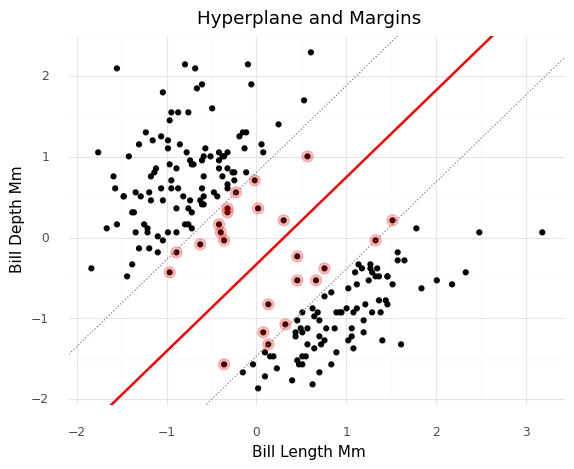

<ggplot: (324918483)>

In [23]:
# Call the plot_hyperplane function with your model and X_train

### YOUR CODE HERE ###

plot_hyperplane(svm1, X_train)


### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

Try a few more values for C that are bigger than our biggest C and smaller than our smallest C, Which values of C lead you to have something that looks more like a Maximal Margin Classifier?

## Another SVM Example

This time, use [this](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/iris.csv) dataset to build a support vector machine using `sepal_width` and `sepal_length` to predict whether an iris flower is a `setosa` (coded as `1`), or `virginica` (coded as `-1`).

We can pull the intercept (bias) and coefficients (weights) from the SVM using `model.coef_` and `model.intercept_` just like we did for Linear and Logistic Regression in CPSC 392!

- Drop missing data (if any)
- Split your data into a train/test split (80/20)
- z-score your predictors
- Build an empty `SVC()` model with `kernel = "linear"` and `C = 0.1`.
- fit the model
- print out the train/test accuracies, and roc aucs.


In [27]:
### YOUR CODE HERE ###
iris = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/iris.csv")

# grab only Versi and Set irises
iris = iris.loc[(iris.species == "versicolor") |  (iris.species == "setosa")]

# head
iris.head()

# Do your train test split, and z score

predictors = ['sepal_width', 'sepal_length']

X = iris[predictors]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

svm2 = SVC(kernel = 'linear', C = 0.1, probability = True)

# Note: We add the "probability" here because SVM cannot do predict_proba otherwise

# fit model

svm2.fit(X_train, y_train)


# assess performance
y_pred_train = svm2.predict(X_train)
y_pred_test = svm2.predict(X_test)

y_pred_train_p = svm2.predict_proba(X_train)[:,1]
y_pred_test_p = svm2.predict_proba(X_test)[:,1]

print('Train Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

print('Train AUC: ', roc_auc_score(y_train, y_pred_train_p))
print('Test AUC: ', roc_auc_score(y_test, y_pred_test_p))



Train Accuracy:  1.0
Test Accuracy:  1.0
Train AUC:  1.0
Test AUC:  1.0


### Margin Width

The formula for the margin width is:

$$ \frac{2}{\lVert \bold{w} \rVert}$$

Where $\lVert \bold{w} \rVert$ refers to the L2 norm of the weights $\bold{w} = \begin{bmatrix} w_1 \\ w_2 \\ ... \\ w_N\end{bmatrix}$.

Remember the L2 norm is calculated by:

$$ L_2 \text{ norm} = \sqrt{\sum_{i=1}^N w_i^2}$$


Using this math, use `model.coef_` to grab the weights/coefficients and calculate the width of the margin for your model using python (Hint: take advantage of `numpy`'s many vectorized functions e.g. `np.sqrt()`)

In [32]:
# Calculate the width of the margin
### YOUR CODE HERE ###

mw = svm2.coef_[0]**2

mw2 = np.sum(mw)

mw3 = np.sqrt(mw2)

print(mw3)


1.288181950784372


## Some Math

### Making New Predictions
In both Support Vector Classifiers and Maximal Margin classifiers, we classify a data point by multiplying its predictors by the weights ($\bold{w}$) and adding the bias ($b$) and checking whether the value is > 0 (positive case, $t_n = 1$), or < 0 (negative case, $t_n = -1$).

In math terms, we calculate $\bold{w} \cdot x_n + b$ and see if it is > 0 or < 0.


### Slack Variables
Remember that Support Vector Classifiers improve upon Maximal Margin Classifiers by introducing slack variables $\xi_i$ that allow data points to violate the margin or even be on the wrong side of the hyperplane. 

Using the model you built for the last question to calculate the slack variables for the data point $z$ which is a random sample from our training data. 

Slack variables are calculated as:

$$\xi_i = max(0, \left |t_i - y(x_i) \right |)$$

Where $y(x_i)$ is the value $\bold{w}*x_n + b$. 

- Use the `plot_hyperplane()` function I wrote to plot the hyperplane for the iris dataset. Then discuss with your group:

1. Which regions of the graph have $\bold{w}*x_n + b > 0$? Which regions have $\bold{w}*x_n + b < 0$?
2. Which regions have slack variables ($\xi_i$) that are 0?
3. Which regions have slack variables ($\xi_i$) that are between 0 and 1?
4. What would have to happen for a slack variable ($\xi_i$) to be < 1?

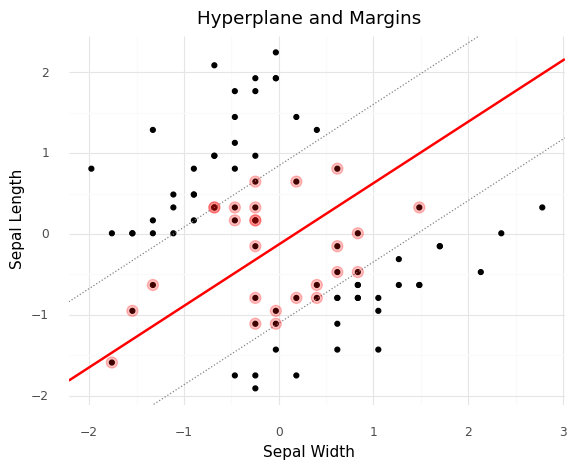

<ggplot: (326225604)>

In [33]:
### YOUR CODE HERE ###
plot_hyperplane(svm2, X_train)

## Yet Another SVC Example

Using [this](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/svmcw.csv) dataset, plot the data using ggplot to make a scatterplot of `X1` and `X2`, colored by `y` (the group of each data point).
### Question
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" alt="Q" width = "200"/>

Is an SVM *able* to do a good job on this dataset?


Then, build an Support Vector Classifier to try to classify the data. How does it do?

- Drop missing data (if any)
- Split your data into a train/test split (80/20)
- z-score your predictors
- Build an empty `SVC()` model with `kernel = "linear"` and `C = 0.001`.
- fit the model
- print out the train/test accuracies, and roc aucs.

In [35]:
### YOUR CODE HERE ###

teddy = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/svmcw.csv")
teddy.dropna()
teddy.head()


,X1,X2,y
0,-1.203055,-1.309099,a
1,-1.486382,-0.159741,a
2,-0.832017,0.246909,a
3,-1.411230,1.565836,a
4,-1.154422,-0.144092,a


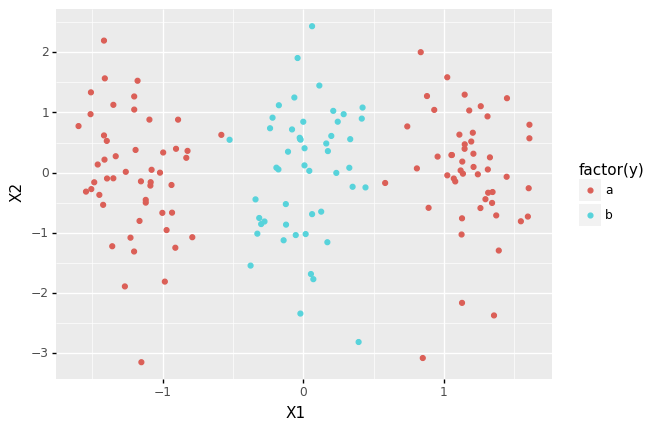

<ggplot: (326284144)>

In [37]:
# plot

### YOUR PLOT HERE ###

(ggplot(teddy, aes(x='X1',y='X2',color = 'factor(y)')) + geom_point())

In [38]:
# Do your train test split, and z score

predictors = ['X1', 'X2']

X = teddy[predictors]
y = teddy['y']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[predictors] = z.fit_transform(X_train[predictors])
X_test[predictors] = z.transform(X_test[predictors])

# build empty model

svm = SVC(kernel = 'linear', C = 0.1, probability = True)

# Note: We add the "probability" here because SVM cannot do predict_proba otherwise

# fit model

svm.fit(X_train, y_train)


# assess performance
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

y_pred_train_p = svm.predict_proba(X_train)[:,1]
y_pred_test_p = svm.predict_proba(X_test)[:,1]

print('Train Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

print('Train AUC: ', roc_auc_score(y_train, y_pred_train_p))
print('Test AUC: ', roc_auc_score(y_test, y_pred_test_p))

Train Accuracy:  0.6583333333333333
Test Accuracy:  0.7
Train AUC:  0.4841000308737265
Test AUC:  0.5291005291005291


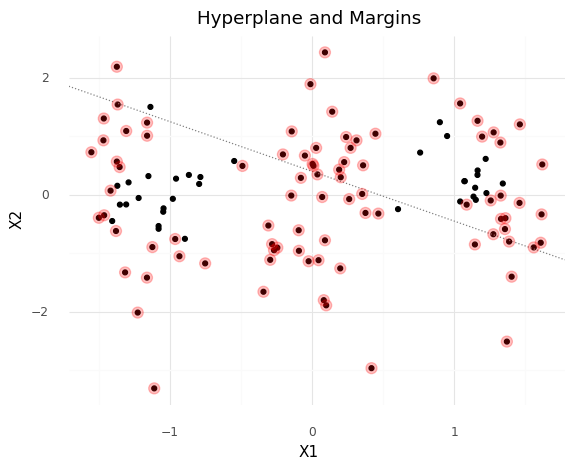

<ggplot: (326223894)>

In [39]:
### YOUR CODE HERE ###

plot_hyperplane(svm, X_train)


